# Explore Exercises

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import prepare

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Explore Sales Stores Items Data

In [158]:
#Acquire the Store Items Sales data
df = pd.read_csv('sales_stores_items.csv')
df.head()

,Unnamed: 0,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [ ]:
#df['sale_date'] = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [159]:
#Prep the data using function from prepare module
df = prepare.prep_sales_store_items_df(df)

In [160]:
#Aggregate data by date and total sales per day
df1 = df.groupby(['sale_date']).sales_total.sum().reset_index()

In [161]:
df1.head()

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85


**Split the data**

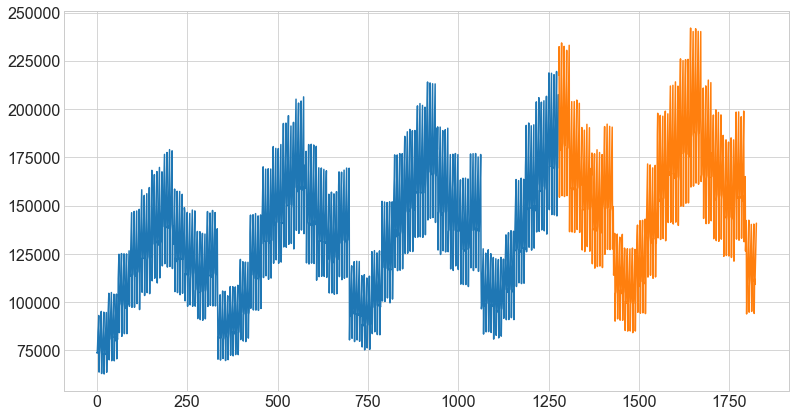

In [162]:
#Define the size of the train dataset
train_size = .70

#n = the number of obsrvations in the dataframe
n = df1.shape[0]

#calculate the index for the start of the test split
test_start_index = round(train_size * n)

train = df1[:test_start_index] # everything up (not including) to the test_start_index
test = df1[test_start_index:] # everything from the test_start_index to the end

#Visulaize the two splits to ensure that each split captures a complete season, cycle, trend
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [163]:
train.head()

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85


In [164]:
#set the datetime index for the train data
train = train.set_index("sale_date").sort_index()

In [165]:
train.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


In [166]:
#Create a column for month
train['month'] = train.index.month_name()

### Visual Exploration

In [167]:
#Set the target to y
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

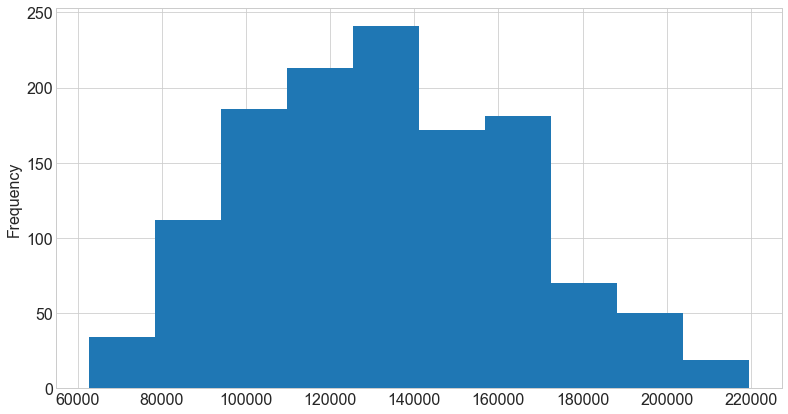

In [168]:
#Plot the distribution of sales_totals
y.plot.hist()

[Text(0.5, 1.0, 'Average Total Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total Sales')]

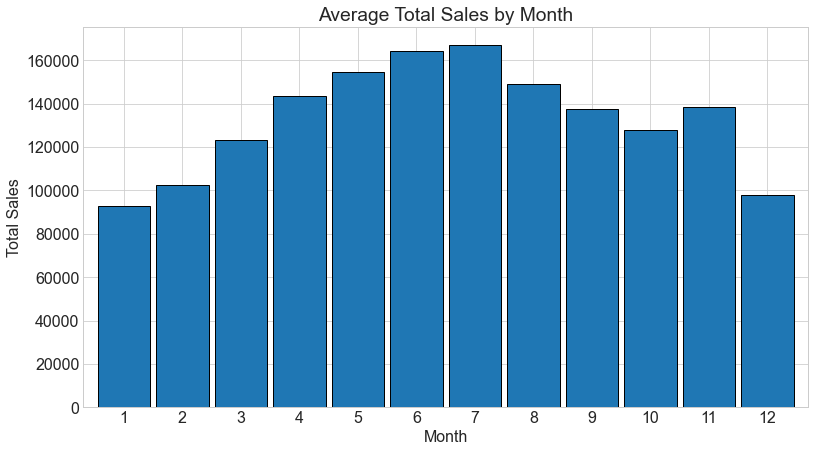

In [169]:
#Plot the dist of total_sales by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Month', xlabel='Month', ylabel='Total Sales')

### Do total sales fluctuate by day of the week?

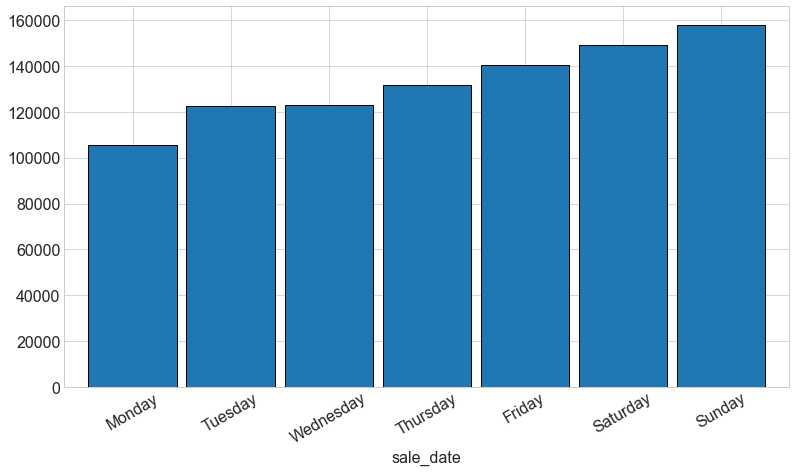

In [170]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar(width=.9, ec='black')
plt.xticks(rotation=30)
ax.set(title='Average Total Sales by Weekday', xlabel='Weekday', ylabel='Total Sales')
plt.show()

**Takeaways:**<br>
    - Sales are greater on weekend days<br>
    - Monday is the day with the lowest total sales

**Do total sales fluctuate by month?**

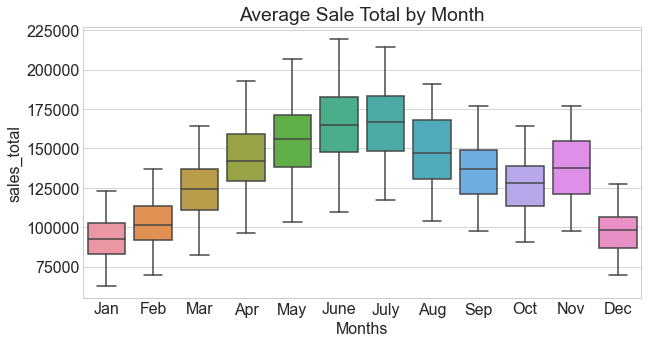

In [171]:
#Boxplot
plt.figure(figsize=(10, 5))
g = sns.boxplot(data = train, x = 'month', y = 'sales_total')
plt.title('Average Sale Total by Month')
g.set(xticklabels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.show()

**Takeaways:**<br>
    - Summer months are busier shopping months where busier is defined by > total sales <br>
    - Almost a perfect bell curve...except for November where sales break the trend...presumably due to the holiday season, shorter daylight hours and cooler weather could contribute to people being home more and buying more groceries. 

### How do sales vary by week intervals?

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

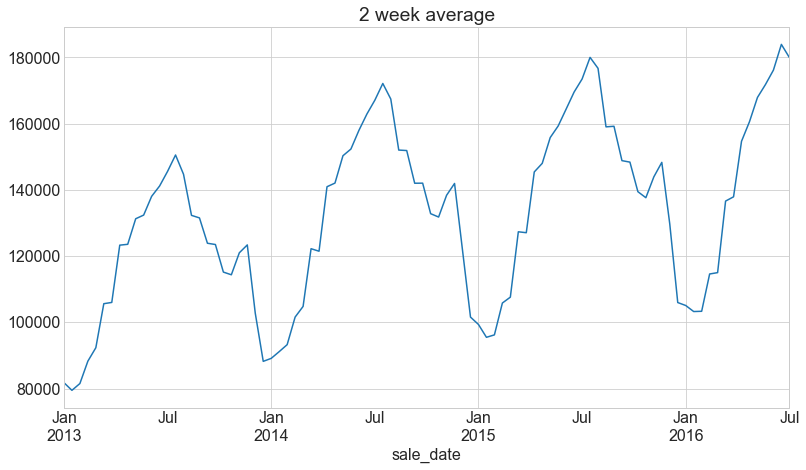

In [172]:
#Plot sales by every two weeks
y.resample('2W').mean().plot(title='2 week average')

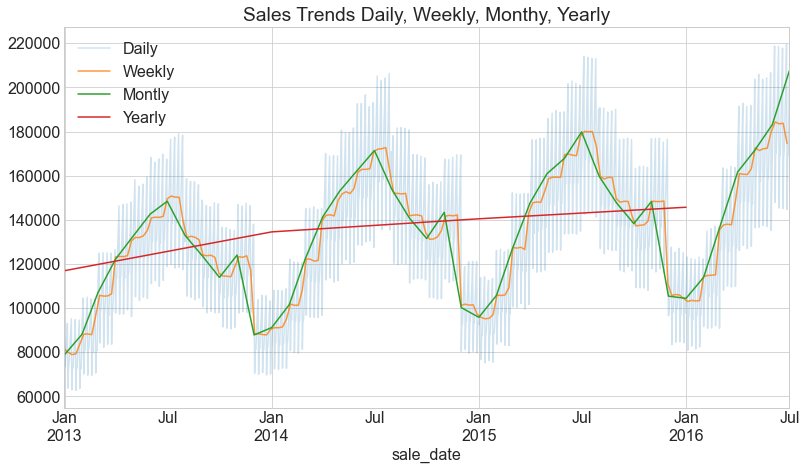

In [173]:
#Visualize total sales by day, week, month, year
y.resample('D').mean().plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Sales Trends Daily, Weekly, Monthy, Yearly')
plt.show()

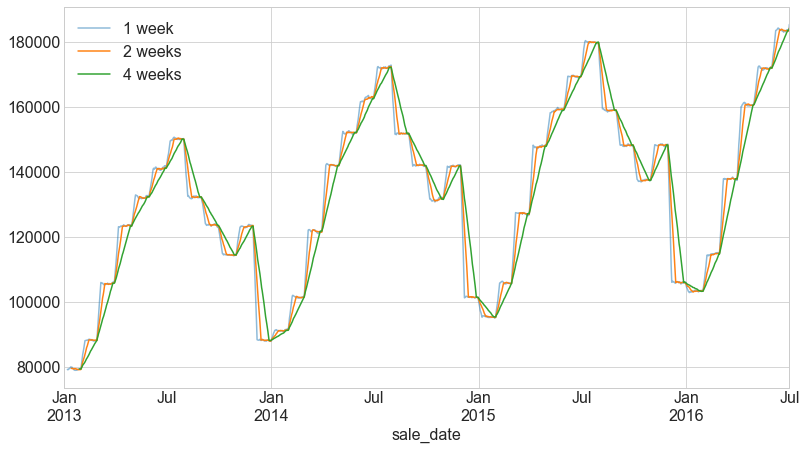

In [174]:
#Visualize with rolling averages to reduce noise
y.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 week')
y.resample('D').mean().rolling(14).mean().plot(alpha=8, label='2 weeks')
y.resample('D').mean().rolling(28).mean().plot(alpha=8, label='4 weeks')
plt.legend()

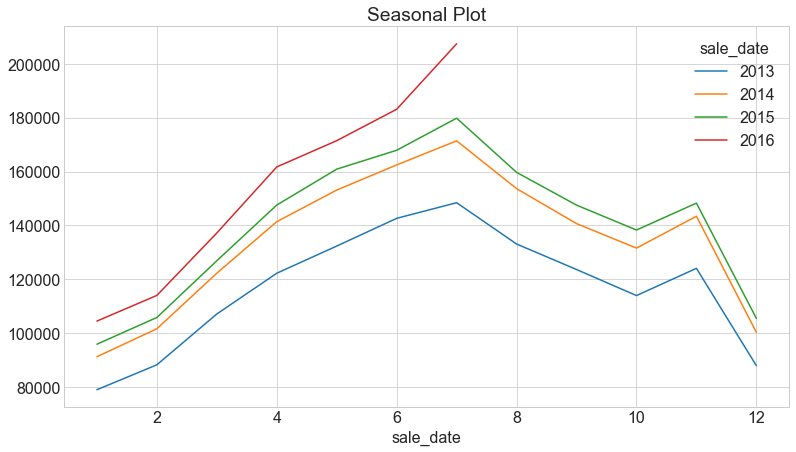

In [175]:
#Explore Seasonality
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

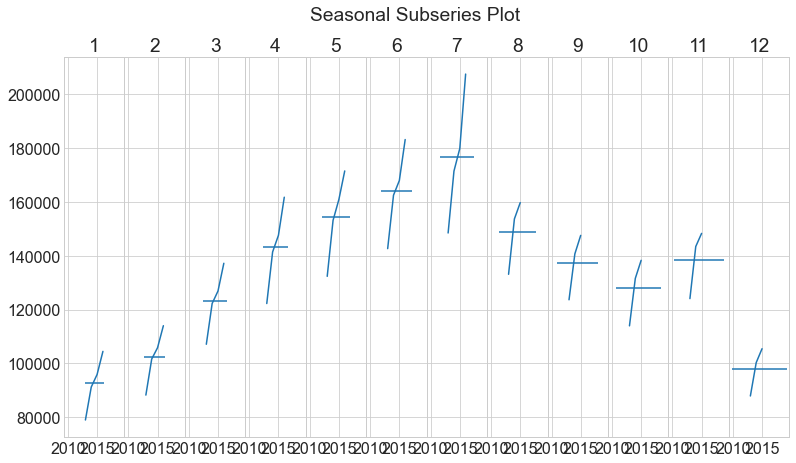

In [176]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

**Explore Change in Total Sales Over Time**

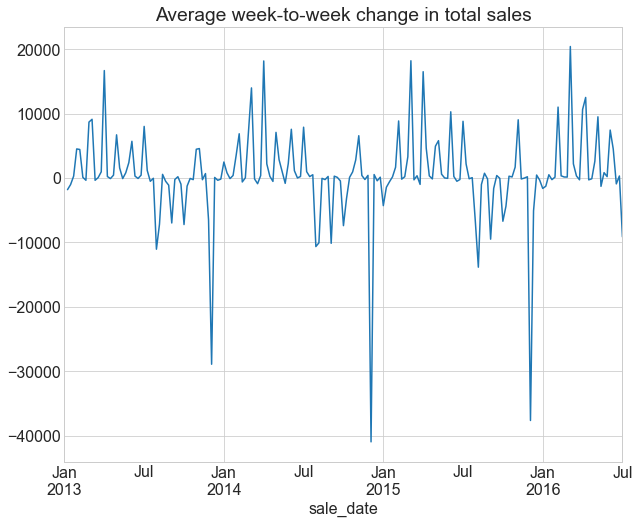

In [177]:
plt.figure(figsize=(10,8))
y.resample('W').mean().diff().plot(title='Average week-to-week change in total sales')
plt.show()

**Takeaways:**
- Whoa...look at the drop off after the December holidays!!!
- Actually, drop offs seem to occur after a lot of holiday weeks

Text(0.5, 1.0, 'Lag plot with lag=7')

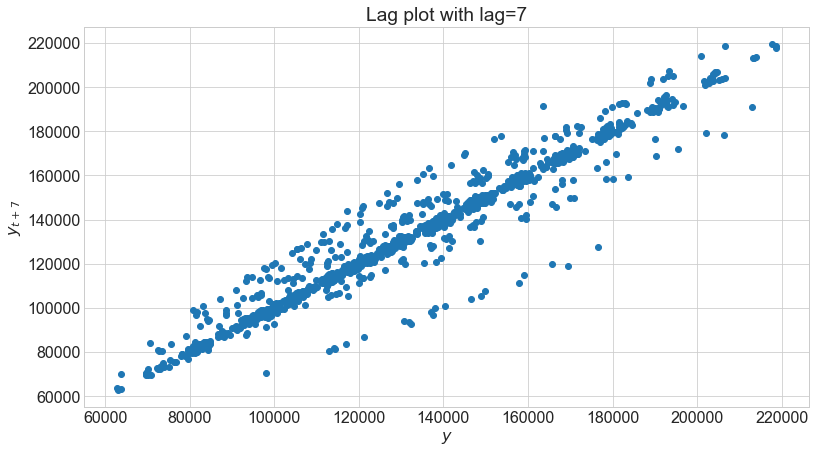

In [178]:
#Visualize a lag plot
plt.scatter(y, y.shift(-7))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 7}$')
plt.title('Lag plot with lag=7')

,this_week,the_next_week
sale_date,,
2013-01-06 00:00:00+00:00,81794.583333,79990.601429
2013-01-13 00:00:00+00:00,79990.601429,78973.360000
2013-01-20 00:00:00+00:00,78973.360000,79272.691429
2013-01-27 00:00:00+00:00,79272.691429,83792.507143
2013-02-03 00:00:00+00:00,83792.507143,88227.801429
...,...,...
2016-06-05 00:00:00+00:00,179882.295714,184381.464286
2016-06-12 00:00:00+00:00,184381.464286,183473.044286
2016-06-19 00:00:00+00:00,183473.044286,183792.654286


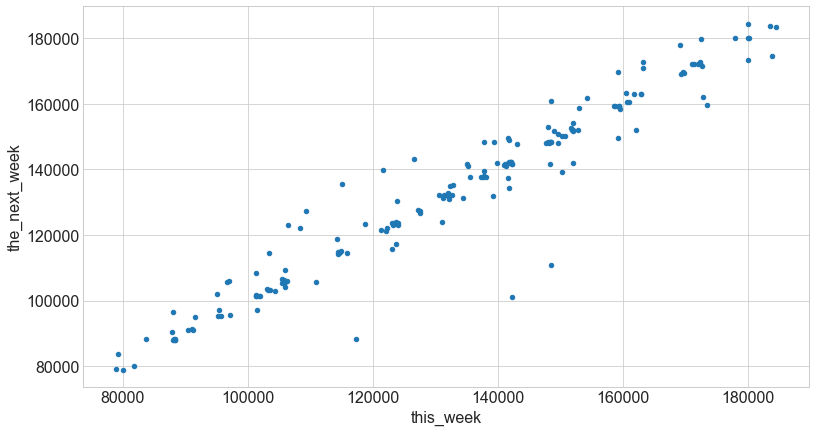

In [179]:
#View the lag data in a chart

#resample train data by weekly mean
weekly = train.resample('W').mean()

#create a column for y+1 (the next week) and shift the sales numbers to match
weekly['the_next_week'] = weekly.sales_total.shift(-1)

#rename sales total which represent the sales for this week
weekly = weekly.rename(columns={'sales_total': 'this_week'})

#create a scatterplot to visualize this weeks sales against next week's sales
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

**Takeaways:**
- I bet those lower points where the sales for the next week drop off are the weeks after the december holidays

**Autocorrelation**

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

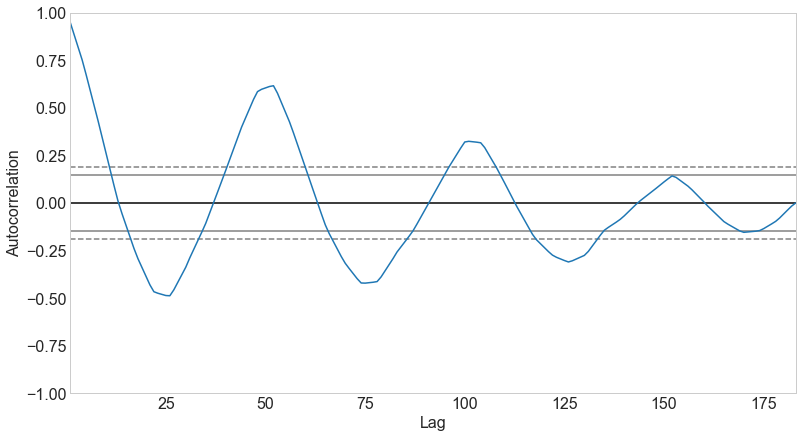

In [180]:
#Plot the autocorrelation
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

**Seasonal Decomposition**

In [181]:
#Let's take a look at the seasonal decomposition of total sales

#set y to the sales total aggregated by weekly mean
y = train.sales_total.resample('W').mean()

#Decompose the data
result = sm.tsa.seasonal_decompose(y)

#Set results to a dataframe for plotting
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-38901.876390,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-38210.382887,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-38830.973862,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-38827.078436,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-36538.820195,NaN


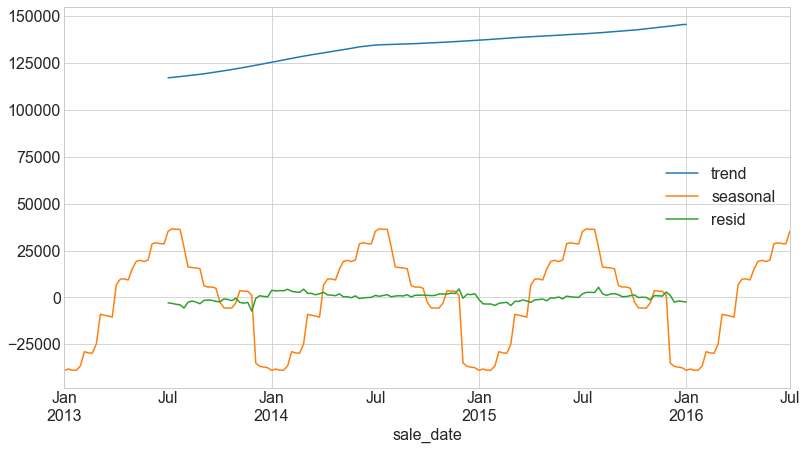

In [182]:
#Visualize the decomposition by trend, seasonal, and residual values
decomposition.iloc[:, 1:].plot()
plt.show()

**Takeaways:**<br>
    - Sales trend upwards year over year, week over week
    - For the first half of the year, sales climb upwards week after week, peak in July, and then trend downward, except for a small peak in Novmeber every year

In [183]:
#Resample by day
train = train.resample('D').mean()

# create a categorical feature for sales
train['sales_bin'] = pd.qcut(train.sales_total, 3, labels=['low', 'avg', 'high'])
train.groupby('sales_bin').mean()

,sales_total
sales_bin,
low,97828.398052
avg,131801.070376
high,168858.169554


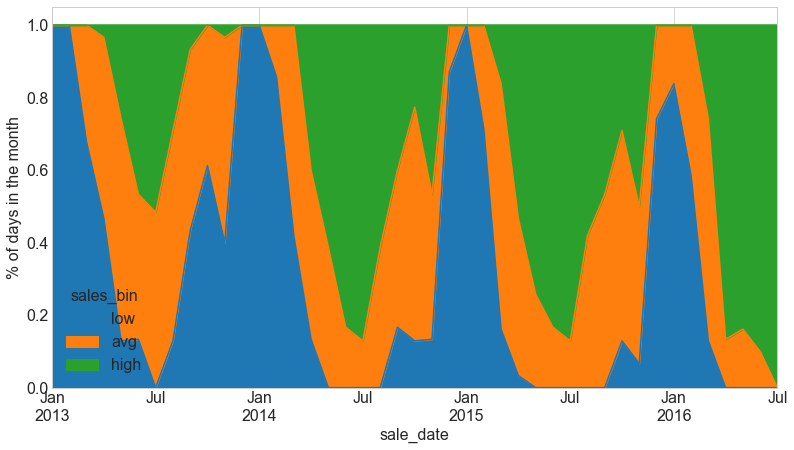

In [184]:
#Visualize categorical total sales

(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')
plt.show()

## Explore OPS Data

In [185]:
def prep_opsd():
    '''
    This functions reads the open power data
    and cleans the dataframe and prepares it for analysis
    '''

    df = pd.read_csv('opsd_germany_daily.csv', index_col='Date', parse_dates=True).sort_index()

    #Create a column for month
    df['month'] = df.index.month_name()

    #Create a column for year
    df['year'] = df.index.year  

    df = df.fillna('0')
    
    df.drop(columns={'Unnamed: 0'}, inplace = True)

    return df

In [186]:
df = prep_opsd()
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0,0,0,January,2006
2006-01-02,1380.521,0,0,0,January,2006
2006-01-03,1442.533,0,0,0,January,2006
2006-01-04,1457.217,0,0,0,January,2006
2006-01-05,1477.131,0,0,0,January,2006


**Split the data into train, test**

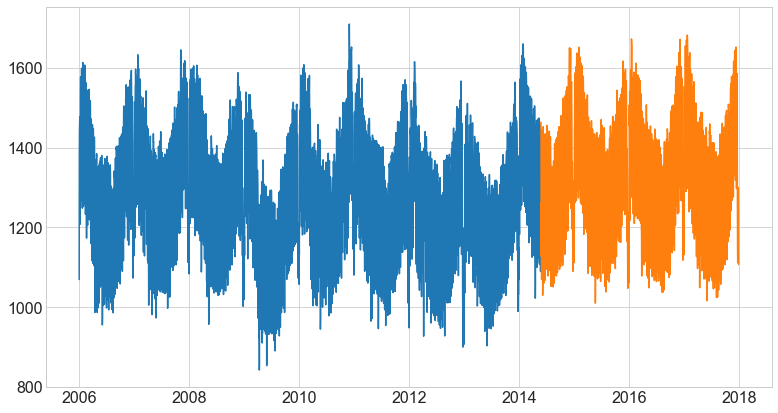

In [187]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

train.head()

In [188]:
#Set the target to y
y = train.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

<AxesSubplot:ylabel='Frequency'>

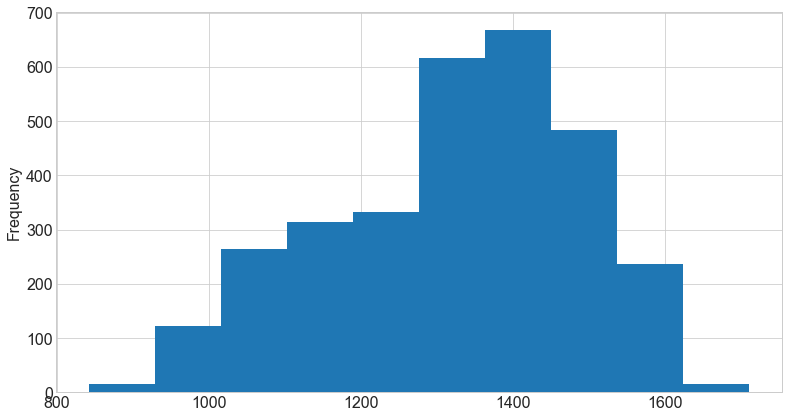

In [189]:
#Visualize the distribution for consumption
train.Consumption.plot.hist()

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

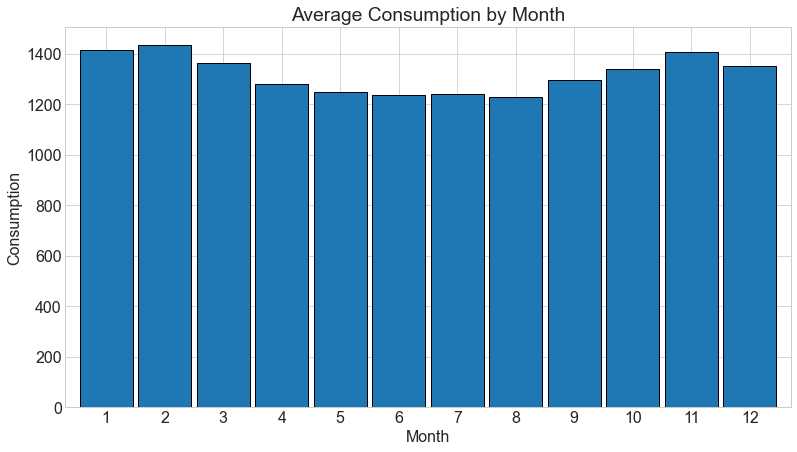

In [190]:
#Explore the distribution and group by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption')

**Takeaways:**
- Seems to make sense the energy consumption is lower during the summer months in Germany when temps are probably more mild and less energy is used to heat homes

[Text(0.5, 1.0, 'Average Consumption by Weekday'),
 Text(0.5, 22.200000000000003, 'Weekday'),
 Text(22.27812499999999, 0.5, 'Consumption')]

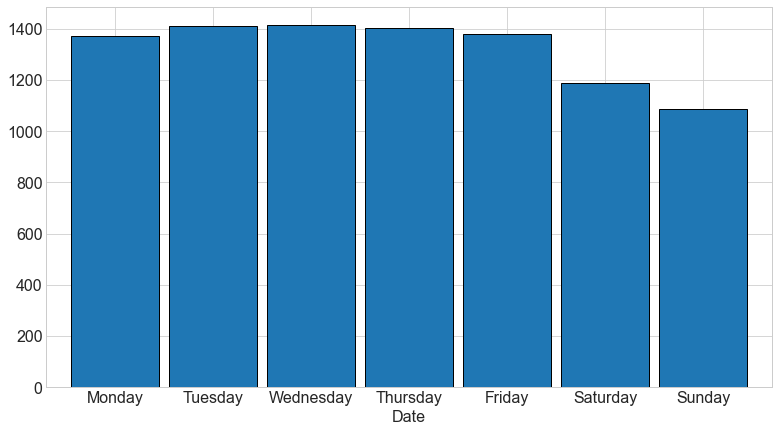

In [191]:
#Explore energy consumption by weekday
y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption')

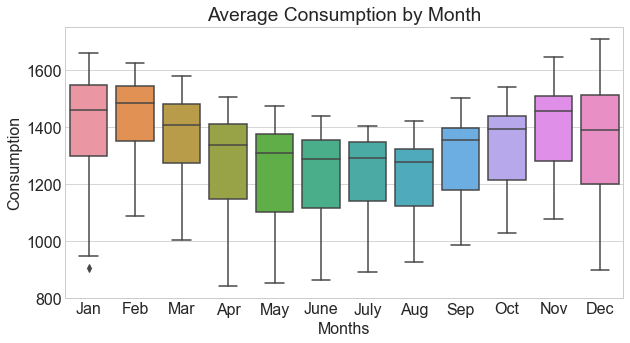

In [192]:
#Boxplot
plt.figure(figsize=(10, 5))
g = sns.boxplot(data = train, x = 'month', y = 'Consumption')
plt.title('Average Consumption by Month')
g.set(xticklabels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.show()

<AxesSubplot:title={'center':'2 week average'}, xlabel='Date'>

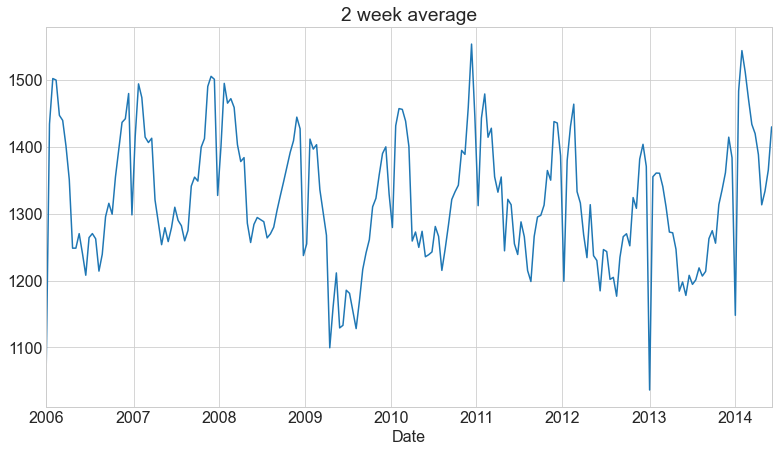

In [193]:
y.resample('2W').mean().plot(title='2 week average')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

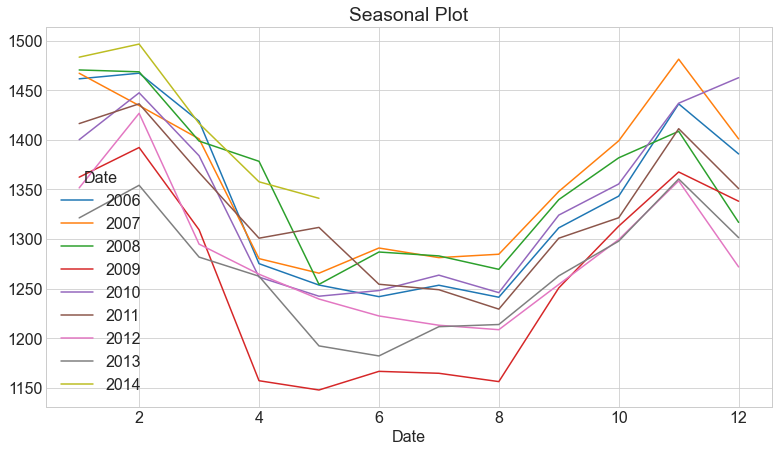

In [194]:
#How does energy consumption compare month by month and year over year?
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

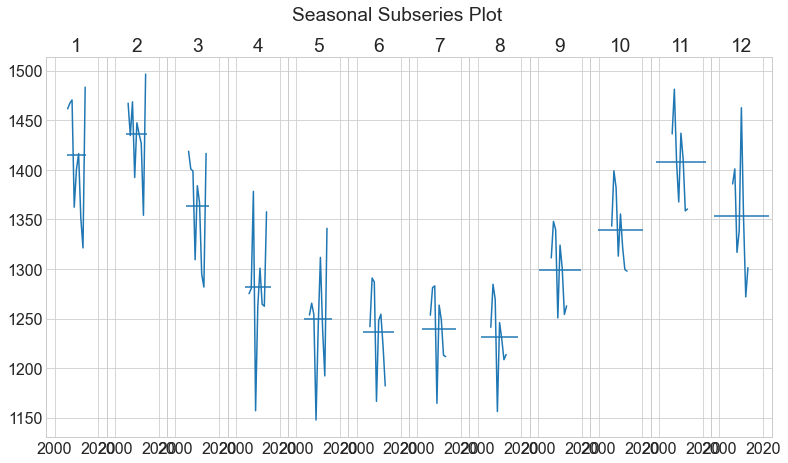

In [195]:
#Create a seasonal subplot

table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

**Takeaways: This chart is difficult to read in this instance. The seasonal plot prior is visually more descriptive** 